# Analysis of Electoral Performance in Municipal Elections in the Metropolitan Region of Recife between 2008 and 2020

## Electoral Perfil

## Environment Settings

In [40]:
# Imports
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt;

In [2]:
# Config PySpark
import os
import sys
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
spark = SparkSession.builder.getOrCreate()

In [3]:
from pyspark.sql.functions import col, sum as _sum;

In [4]:
# Creating a SparkSession
spark = SparkSession.builder.appName("LoadElectionData").getOrCreate();

## Datasets

In [5]:
df_perfil_08 = spark.read.csv('../datasets/perfil_eleitor_secao_2008_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);
df_perfil_16 = spark.read.csv('../datasets/perfil_eleitor_secao_2016_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);

In [6]:
df_perfil_08.show(5)

+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+--------------------+--------------------+--------------------+-------------------+----------------------+------------------------+--------------------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|SG_UF|CD_MUNICIPIO|NM_MUNICIPIO|CD_MUN_SIT_BIOMETRICA|DS_MUN_SIT_BIOMETRICA|NR_ZONA|NR_SECAO|NR_LOCAL_VOTACAO|CD_GENERO|DS_GENERO|CD_ESTADO_CIVIL|DS_ESTADO_CIVIL|CD_FAIXA_ETARIA|     DS_FAIXA_ETARIA|CD_GRAU_ESCOLARIDADE|DS_GRAU_ESCOLARIDADE|QT_ELEITORES_PERFIL|QT_ELEITORES_BIOMETRIA|QT_ELEITORES_DEFICIENCIA|QT_ELEITORES_INC_NM_SOCIAL|
+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+----------------

In [7]:
df_perfil_16.show(5)

+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+--------------------+--------------------+--------------------+-------------------+----------------------+------------------------+--------------------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|SG_UF|CD_MUNICIPIO|NM_MUNICIPIO|CD_MUN_SIT_BIOMETRICA|DS_MUN_SIT_BIOMETRICA|NR_ZONA|NR_SECAO|NR_LOCAL_VOTACAO|CD_GENERO|DS_GENERO|CD_ESTADO_CIVIL|DS_ESTADO_CIVIL|CD_FAIXA_ETARIA|     DS_FAIXA_ETARIA|CD_GRAU_ESCOLARIDADE|DS_GRAU_ESCOLARIDADE|QT_ELEITORES_PERFIL|QT_ELEITORES_BIOMETRIA|QT_ELEITORES_DEFICIENCIA|QT_ELEITORES_INC_NM_SOCIAL|
+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+----------------

In [8]:
# Região Metropolitana
rmr = ['ABREU E LIMA', 'ARAÇOIABA', 'CABO DE SANTO AGOSTINHO', 'CAMARAGIBE', 'IGARASSU',
 'ILHA DE ITAMARACÁ', 'IPOJUCA', 'ITAPISSUMA', 'JABOATÃO DOS GUARARAPES', 'MORENO',
 'OLINDA', 'PAULISTA', 'RECIFE', 'SÃO LOURENÇO DA MATA'];

## Questions

In [9]:
df_rmr_08 = df_perfil_08.filter(df_perfil_08["NM_MUNICIPIO"].isin(rmr))
df_rmr_16 = df_perfil_16.filter(df_perfil_16["NM_MUNICIPIO"].isin(rmr))

In [10]:
df_rmr_16.show(3)

+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+--------------------+--------------------+--------------------+-------------------+----------------------+------------------------+--------------------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|SG_UF|CD_MUNICIPIO|NM_MUNICIPIO|CD_MUN_SIT_BIOMETRICA|DS_MUN_SIT_BIOMETRICA|NR_ZONA|NR_SECAO|NR_LOCAL_VOTACAO|CD_GENERO|DS_GENERO|CD_ESTADO_CIVIL|DS_ESTADO_CIVIL|CD_FAIXA_ETARIA|     DS_FAIXA_ETARIA|CD_GRAU_ESCOLARIDADE|DS_GRAU_ESCOLARIDADE|QT_ELEITORES_PERFIL|QT_ELEITORES_BIOMETRIA|QT_ELEITORES_DEFICIENCIA|QT_ELEITORES_INC_NM_SOCIAL|
+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+----------------

### Perfil Etário

In [11]:
df_grouped_perfil_08 = df_rmr_08.groupBy("DS_FAIXA_ETARIA").sum("QT_ELEITORES_PERFIL");
df_grouped_perfil_16 = df_rmr_16.groupBy("DS_FAIXA_ETARIA").sum("QT_ELEITORES_PERFIL");

In [12]:
datasets = [
    df_grouped_perfil_08,
    df_grouped_perfil_16
]

In [13]:
# Show the aggregated DataFrame
df_grouped_perfil_16.show(df_grouped_perfil_16.count());

+--------------------+------------------------+
|     DS_FAIXA_ETARIA|sum(QT_ELEITORES_PERFIL)|
+--------------------+------------------------+
|16 anos          ...|                    9710|
|70 a 74 anos     ...|                   66471|
|20 anos          ...|                   57120|
|95 a 99 anos     ...|                    1267|
|18 anos          ...|                   43958|
|60 a 64 anos     ...|                  153485|
|Inválido         ...|                     134|
|25 a 29 anos     ...|                  292487|
|75 a 79 anos     ...|                   37307|
|50 a 54 anos     ...|                  234103|
|40 a 44 anos     ...|                  278466|
|21 a 24 anos     ...|                  230860|
|35 a 39 anos     ...|                  304164|
|100 anos ou mais ...|                     339|
|90 a 94 anos     ...|                    6234|
|17 anos          ...|                   23554|
|65 a 69 anos     ...|                  115462|
|45 a 49 anos     ...|                  

In [14]:
order_DS_FAIXA_ETARIA = {
    "16 anos": 0,
    "17 anos": 1,
    "18 anos": 2,
    "19 anos": 3,
    "20 anos": 4,
    "21 a 24 anos": 5,
    "25 a 29 anos": 6,
    "30 a 34 anos": 7,
    "35 a 39 anos": 8,
    "40 a 44 anos": 9,
    "45 a 49 anos": 10,
    "50 a 54 anos": 11,
    "55 a 59 anos": 12,
    "60 a 64 anos": 13,
    "65 a 69 anos": 14,
    "70 a 74 anos": 15,
    "75 a 79 anos": 16,
    "80 a 84 anos": 17,
    "85 a 89 anos": 18,
    "90 a 94 anos": 19,
    "95 a 99 anos": 20,
    "100 anos ou mais": 21,
    "Inválido": 22
};

In [15]:
def limpar_faixa_etaria(valor):
    for chave in order_DS_FAIXA_ETARIA.keys():
        if chave in valor:
            return chave;
    return 'Não encontrado';  # Retorna este valor para identificar se algum valor não foi encontrado

i = 0;

for df in datasets:
    df_pd_perfil = df.toPandas();

    df_pd_perfil['DS_FAIXA_ETARIA'] = df_pd_perfil['DS_FAIXA_ETARIA'].apply(limpar_faixa_etaria);

    # Criar uma nova coluna 'categoria_idade' baseada nos valores do dicionário
    df_pd_perfil['categoria_idade'] = df_pd_perfil['DS_FAIXA_ETARIA'].apply(lambda x: order_DS_FAIXA_ETARIA.get(x, -1));

    df_pd_perfil.set_index('categoria_idade', inplace=True);
    df_pd_perfil.sort_index(inplace=True);

    df_pd_perfil = df_pd_perfil[::-1]
    
    datasets[i] = df_pd_perfil;
    i += 1;

In [16]:
print(datasets[1])

                  DS_FAIXA_ETARIA  sum(QT_ELEITORES_PERFIL)
categoria_idade                                            
22                       Inválido                       134
21               100 anos ou mais                       339
20                   95 a 99 anos                      1267
19                   90 a 94 anos                      6234
18                   85 a 89 anos                     10654
17                   80 a 84 anos                     18396
16                   75 a 79 anos                     37307
15                   70 a 74 anos                     66471
14                   65 a 69 anos                    115462
13                   60 a 64 anos                    153485
12                   55 a 59 anos                    193403
11                   50 a 54 anos                    234103
10                   45 a 49 anos                    253974
9                    40 a 44 anos                    278466
8                    35 a 39 anos       

In [17]:
for df in datasets:
    # Calcular o total da coluna 'sum(QT_ELEITORES_PERFIL)'
    total = df['sum(QT_ELEITORES_PERFIL)'].sum()

    # Calcular a porcentagem e adicionar como uma nova coluna
    df['Porcentagem'] = (df['sum(QT_ELEITORES_PERFIL)'] / total) * 100

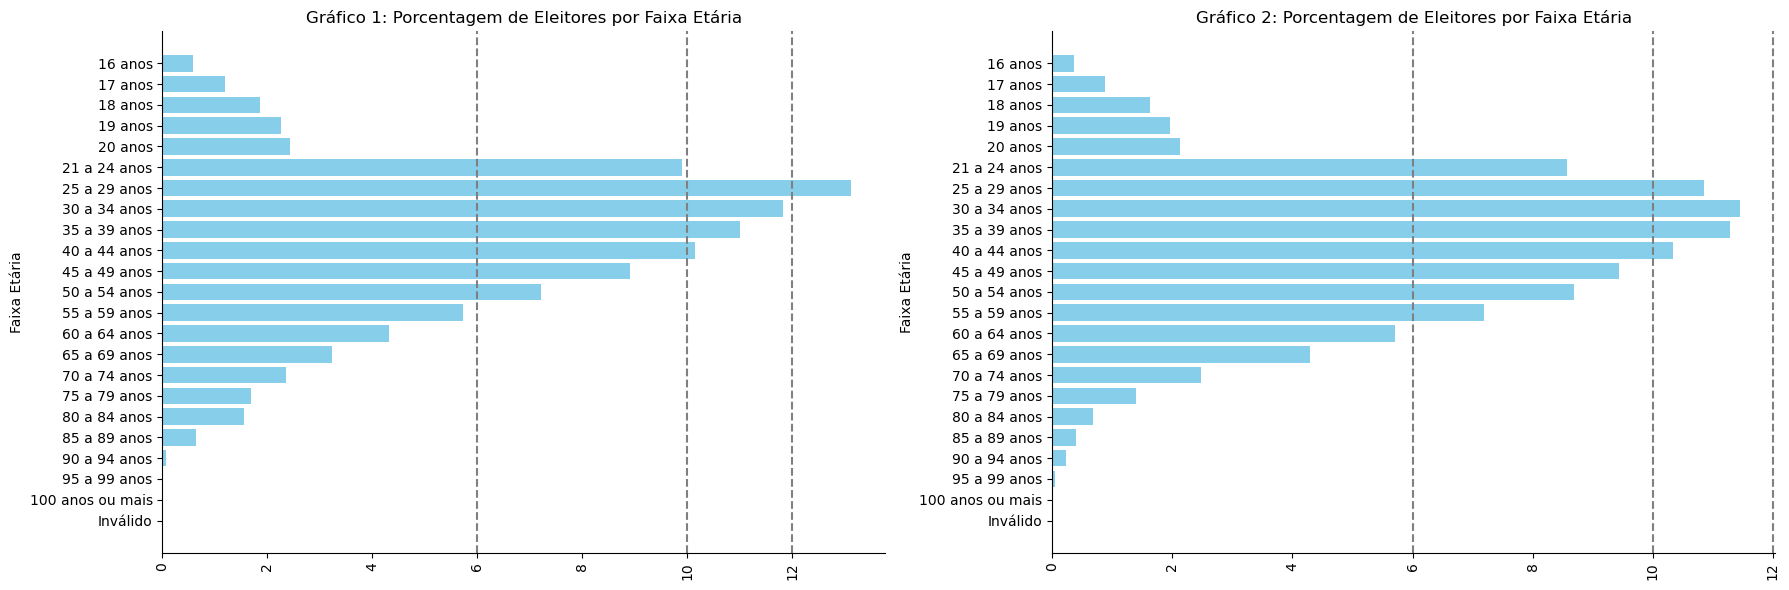

In [18]:
plt.figure(figsize=(18, 6))  # Definir o tamanho da figura

for i, df in enumerate(datasets, start=1):
    plt.subplot(1, 2, i)  # Subplot na linha única, coluna i (1 ou 2)
    plt.barh(df['DS_FAIXA_ETARIA'], df['Porcentagem'], color='skyblue')
    plt.ylabel('Faixa Etária')
    plt.title(f'Gráfico {i}: Porcentagem de Eleitores por Faixa Etária')
    plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adicionar linhas pontilhadas nos pontos 6, 10 e 12 do eixo 'Porcentagem'
    ax.axvline(x=6, color='gray', linestyle='--')
    ax.axvline(x=10, color='gray', linestyle='--')
    ax.axvline(x=12, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

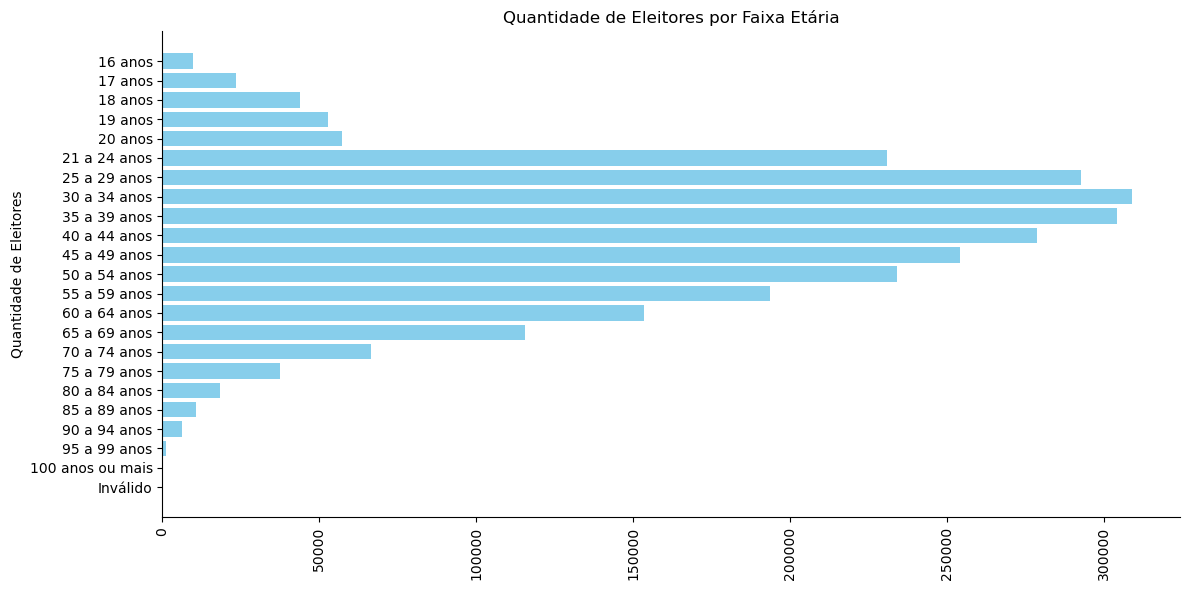

In [19]:
# df_pd_grouped_perfil = df_pd_grouped_perfil[::-1]
df_pro = datasets[1]

plt.figure(figsize=(12, 6))  # Definir o tamanho da figura
plt.barh(df_pro['DS_FAIXA_ETARIA'], df_pro['sum(QT_ELEITORES_PERFIL)'], color='skyblue')
plt.ylabel('Quantidade de Eleitores')
plt.title('Quantidade de Eleitores por Faixa Etária')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()  

In [20]:
# vereadores mais votados em cada eleição entre 2008 e 2020
# vereadores mais votados entre 2008 e 2020
# distribuição da porcentagem de votos entre municípios da RMR
# desempenho partidário para verdeadores (linhas)
# votação por partido?

### Perfil Grau de Escolaridade

In [21]:
df_grouped_escol_08 = df_rmr_08.groupBy("DS_GRAU_ESCOLARIDADE").sum("QT_ELEITORES_PERFIL");
df_grouped_escol_16 = df_rmr_16.groupBy("DS_GRAU_ESCOLARIDADE").sum("QT_ELEITORES_PERFIL");

In [23]:
df_grouped_escol_16.show(df_grouped_escol_16.count());

+--------------------+------------------------+
|DS_GRAU_ESCOLARIDADE|sum(QT_ELEITORES_PERFIL)|
+--------------------+------------------------+
|ENSINO MÉDIO INCO...|                  400759|
| SUPERIOR INCOMPLETO|                  152840|
|        LÊ E ESCREVE|                  199567|
|ENSINO FUNDAMENTA...|                  153144|
|   SUPERIOR COMPLETO|                  306621|
|ENSINO MÉDIO COMP...|                  717377|
|ENSINO FUNDAMENTA...|                  677339|
|       NÃO INFORMADO|                     759|
|          ANALFABETO|                   84438|
+--------------------+------------------------+



In [28]:
df_grouped_escol_16_pd = df_grouped_escol_16.toPandas();
df_grouped_escol_08_pd = df_grouped_escol_08.toPandas();

In [29]:
total_eleitores_08 = df_grouped_escol_08_pd["sum(QT_ELEITORES_PERFIL)"].sum()
total_eleitores_16 = df_grouped_escol_16_pd["sum(QT_ELEITORES_PERFIL)"].sum()

total_eleitores_08["ANO"] = 2008
total_eleitores_16["ANO"] = 2016

# Calculando a porcentagem e adicionando a nova coluna
df_grouped_escol_08_pd["PORCENTAGEM"] = (df_grouped_escol_08_pd["sum(QT_ELEITORES_PERFIL)"] / total_eleitores_08) * 100
df_grouped_escol_16_pd["PORCENTAGEM"] = (df_grouped_escol_16_pd["sum(QT_ELEITORES_PERFIL)"] / total_eleitores_16) * 100


print(df_grouped_escol_16_pd)

            DS_GRAU_ESCOLARIDADE  sum(QT_ELEITORES_PERFIL)  PORCENTAGEM
0        ENSINO MÉDIO INCOMPLETO                    400759    14.882370
1            SUPERIOR INCOMPLETO                    152840     5.675784
2                   LÊ E ESCREVE                    199567     7.411012
3    ENSINO FUNDAMENTAL COMPLETO                    153144     5.687073
4              SUPERIOR COMPLETO                    306621    11.386512
5          ENSINO MÉDIO COMPLETO                    717377    26.640125
6  ENSINO FUNDAMENTAL INCOMPLETO                    677339    25.153295
7                  NÃO INFORMADO                       759     0.028186
8                     ANALFABETO                     84438     3.135644


In [30]:
new_order = [
    "SUPERIOR COMPLETO",
    "SUPERIOR INCOMPLETO",
    "ENSINO MÉDIO COMPLETO",
    "ENSINO MÉDIO INCOMPLETO",
    "ENSINO FUNDAMENTAL COMPLETO",
    "ENSINO FUNDAMENTAL INCOMPLETO",
    "LÊ E ESCREVE",
    "ANALFABETO",
    "NÃO INFORMADO",
]

# Definir a coluna DS_GRAU_ESCOLARIDADE como categórica com a nova ordem e ordenar
df_grouped_escol_08_pd["DS_GRAU_ESCOLARIDADE"] = pd.Categorical(df_grouped_escol_08_pd["DS_GRAU_ESCOLARIDADE"], categories=new_order, ordered=True)
df_grouped_escol_08_pd = df_grouped_escol_08_pd.sort_values("DS_GRAU_ESCOLARIDADE")

df_grouped_escol_16_pd["DS_GRAU_ESCOLARIDADE"] = pd.Categorical(df_grouped_escol_16_pd["DS_GRAU_ESCOLARIDADE"], categories=new_order, ordered=True)
df_grouped_escol_16_pd = df_grouped_escol_16_pd.sort_values("DS_GRAU_ESCOLARIDADE")

# Redefinir o índice para manter a ordem correta no DataFrame
df_grouped_escol_08_pd = df_grouped_escol_08_pd.reset_index(drop=True)
df_grouped_escol_16_pd = df_grouped_escol_16_pd.reset_index(drop=True)

df_combined = pd.concat([df_grouped_escol_08_pd, df_grouped_escol_16_pd])

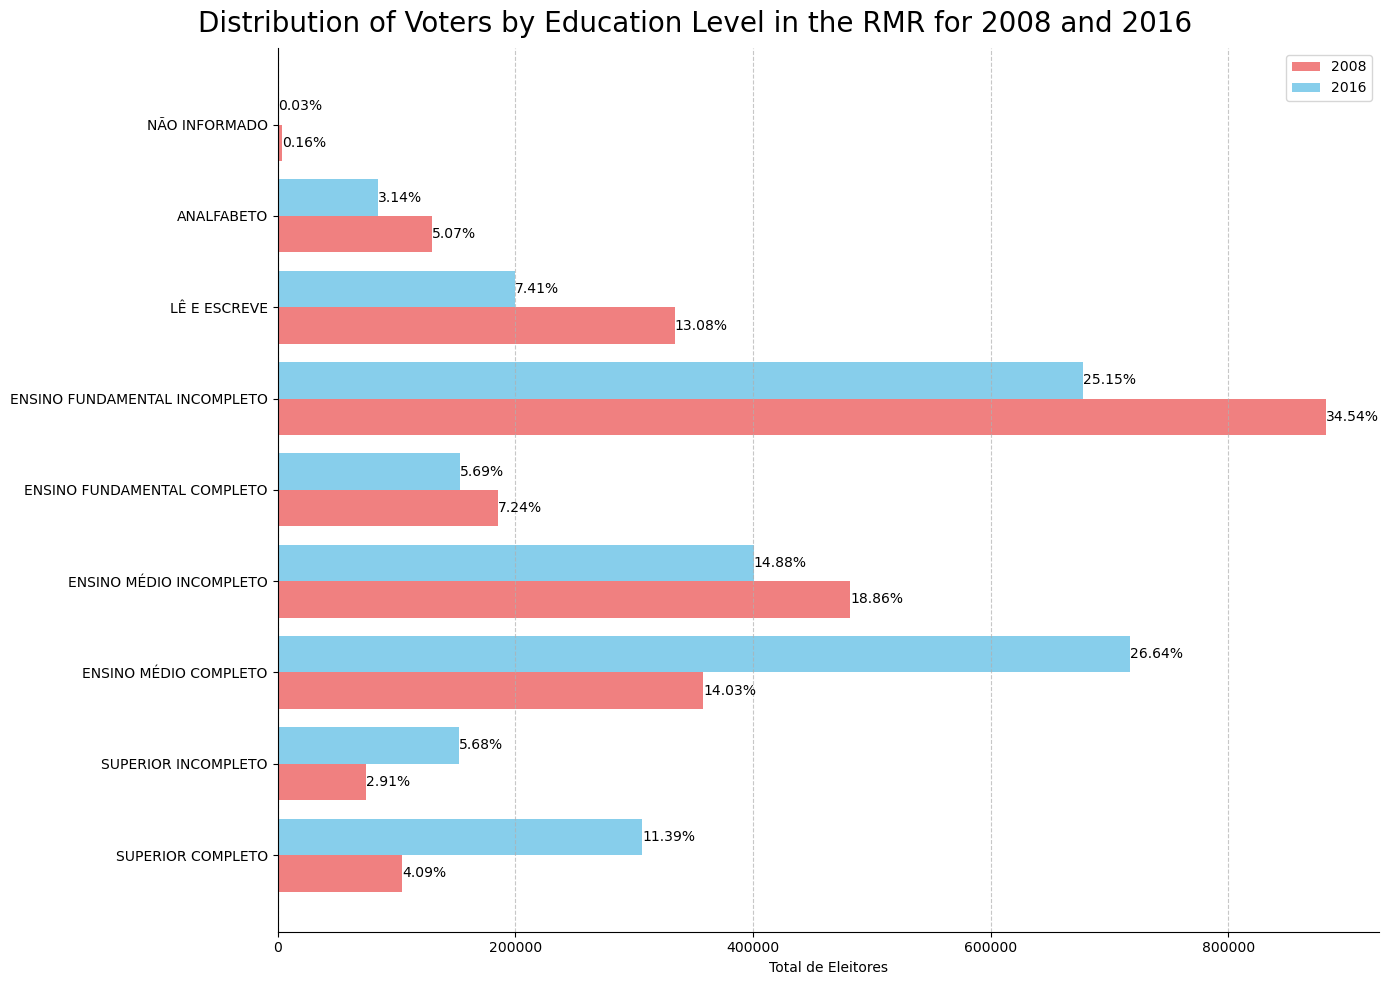

In [42]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.suptitle('Distribution of Voters by Education Level in the RMR for 2008 and 2016', fontsize=20)

bar_width = 0.4

# Posições das barras no eixo Y
r1 = np.arange(len(df_grouped_escol_08_pd))
r2 = [x + bar_width for x in r1]

# Gráfico para 2008
bars_2008 = ax.barh(r1, df_grouped_escol_08_pd["sum(QT_ELEITORES_PERFIL)"], color='lightcoral', height=bar_width, label='2008')
for index, value in enumerate(df_grouped_escol_08_pd["sum(QT_ELEITORES_PERFIL)"]):
    ax.text(value, r1[index], f'{df_grouped_escol_08_pd["PORCENTAGEM"].iloc[index]:.2f}%', va='center')

# Gráfico para 2016
bars_2016 = ax.barh(r2, df_grouped_escol_16_pd["sum(QT_ELEITORES_PERFIL)"], color='skyblue', height=bar_width, label='2016')
for index, value in enumerate(df_grouped_escol_16_pd["sum(QT_ELEITORES_PERFIL)"]):
    ax.text(value, r2[index], f'{df_grouped_escol_16_pd["PORCENTAGEM"].iloc[index]:.2f}%', va='center')

# Configurações adicionais do gráfico
ax.set_xlabel('Total de Eleitores')
ax.set_yticks([r + bar_width / 2 for r in range(len(df_grouped_escol_08_pd))])
ax.set_yticklabels(df_grouped_escol_08_pd["DS_GRAU_ESCOLARIDADE"])

# Remover as linhas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar linhas pontilhadas claras para os valores do eixo Y
ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.legend()
plt.tight_layout()
plt.savefig('../imagens/Voters_by_Education_Level_in_RMR_for_2008_2016.png', format='png')
plt.show()

### Perfil Estado Civil

In [43]:
df_grouped_ecivil_08 = df_rmr_08.groupBy("DS_ESTADO_CIVIL").sum("QT_ELEITORES_PERFIL");
df_grouped_ecivil_16 = df_rmr_16.groupBy("DS_ESTADO_CIVIL").sum("QT_ELEITORES_PERFIL");

In [44]:
df_grouped_ecivil_16.show(df_grouped_ecivil_16.count());

+--------------------+------------------------+
|     DS_ESTADO_CIVIL|sum(QT_ELEITORES_PERFIL)|
+--------------------+------------------------+
|            SOLTEIRO|                 1712413|
|SEPARADO JUDICIAL...|                   15416|
|              CASADO|                  804623|
|          DIVORCIADO|                   90257|
|               VIÚVO|                   68764|
|       NÃO INFORMADO|                    1371|
+--------------------+------------------------+



In [45]:
df_grouped_ecivil_16 = df_grouped_ecivil_16.toPandas();
df_grouped_ecivil_08 = df_grouped_ecivil_08.toPandas();

In [48]:
df_grouped_ecivil_16.head()

,DS_ESTADO_CIVIL,sum(QT_ELEITORES_PERFIL)
0,SOLTEIRO,1712413
1,SEPARADO JUDICIALMENTE,15416
2,CASADO,804623
3,DIVORCIADO,90257
4,VIÚVO,68764


In [49]:
total_df_grouped_ecivil_08 = df_grouped_ecivil_08["sum(QT_ELEITORES_PERFIL)"].sum()
total_df_grouped_ecivil_16 = df_grouped_ecivil_16["sum(QT_ELEITORES_PERFIL)"].sum()

df_grouped_ecivil_08["ANO"] = 2008
df_grouped_ecivil_16["ANO"] = 2016

# Calculando a porcentagem e adicionando a nova coluna
df_grouped_ecivil_08["PORCENTAGEM"] = (df_grouped_ecivil_08["sum(QT_ELEITORES_PERFIL)"] / total_df_grouped_ecivil_08) * 100
df_grouped_ecivil_16["PORCENTAGEM"] = (df_grouped_ecivil_16["sum(QT_ELEITORES_PERFIL)"] / total_df_grouped_ecivil_16) * 100


print(df_grouped_ecivil_16)

          DS_ESTADO_CIVIL  sum(QT_ELEITORES_PERFIL)   ANO  PORCENTAGEM
0                SOLTEIRO                   1712413  2016    63.591244
1  SEPARADO JUDICIALMENTE                     15416  2016     0.572480
2                  CASADO                    804623  2016    29.880045
3              DIVORCIADO                     90257  2016     3.351735
4                   VIÚVO                     68764  2016     2.553583
5           NÃO INFORMADO                      1371  2016     0.050913


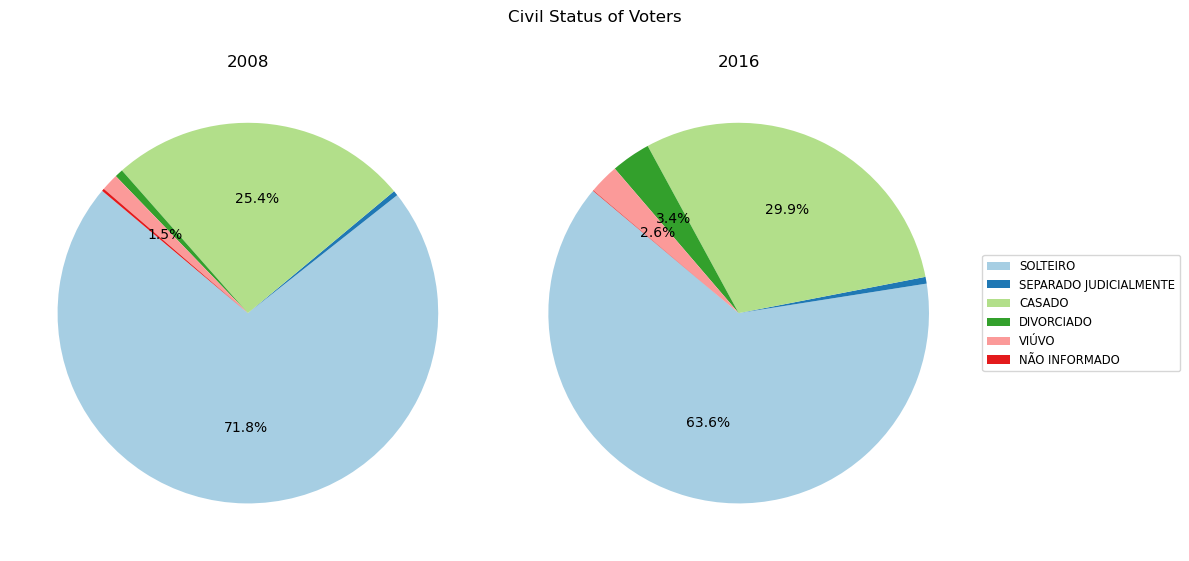

In [69]:
# Configuração do gráfico
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Civil Status of Voters')

# Cores para cada categoria
cores = plt.cm.Paired(range(len(df_grouped_ecivil_16["DS_ESTADO_CIVIL"])))

# Função para formatar o autopct sem exibir valores absolutos
def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct >= 1 else ''

# Gráfico de pizza para 2016
wedges1, texts1, autotexts1 = ax1.pie(df_grouped_ecivil_16["sum(QT_ELEITORES_PERFIL)"], labels=None, autopct=my_autopct, startangle=140, colors=cores)
ax1.set_title('2016')

# Gráfico de pizza para 2008
wedges2, texts2, autotexts2 = ax2.pie(df_grouped_ecivil_08["sum(QT_ELEITORES_PERFIL)"], labels=None, autopct=my_autopct, startangle=140, colors=cores)
ax2.set_title('2008')

# Criar legenda com as cores e os nomes das categorias para ambos os gráficos
ax1.legend(wedges1, df_grouped_ecivil_16["DS_ESTADO_CIVIL"], loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Salvar o gráfico
plt.savefig('../imagens/Civil_Status_of_Voters_2008_and_2016.png', format='png')

# Exibir o gráfico
plt.show()

### Brancos e Nulos entre 2008 e 2020